In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

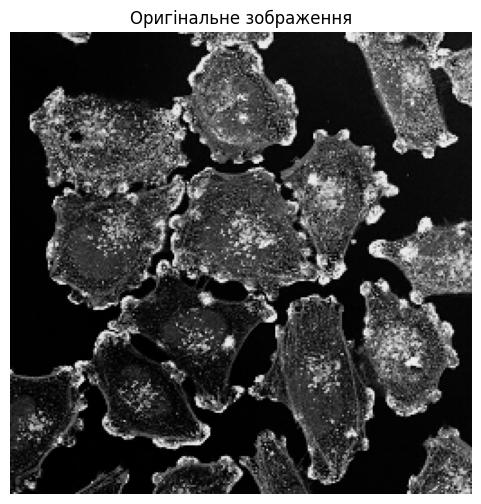

In [2]:
# Завантаження зображення в градаціях сірого
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))

# Відображення оригінального зображення
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Оригінальне зображення')
plt.axis('off')
plt.show()

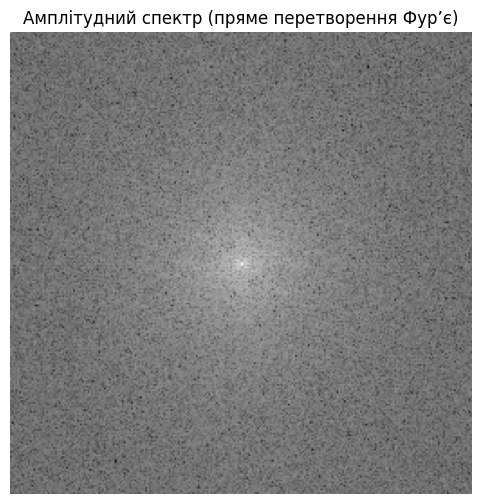

In [3]:
# 1. Пряме дискретне перетворення Фур’є
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)  # Зсунення нульової частоти до центру спектра

# Візуалізація амплітудного спектра
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted) + 1)  # Додати 1, щоб уникнути log(0)
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Амплітудний спектр (пряме перетворення Фур’є)')
plt.axis('off')
plt.show()

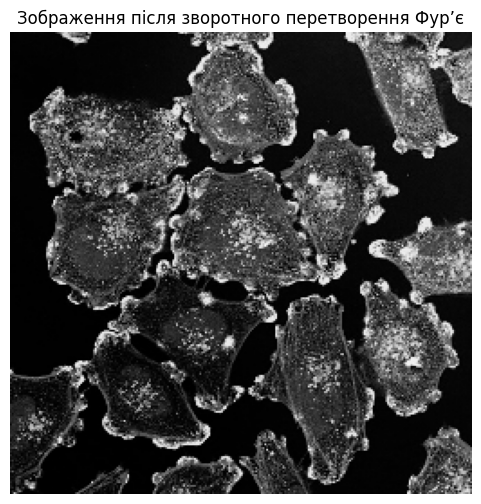

In [4]:
# 2. Зворотне дискретне перетворення Фур’є
inverse_shifted = np.fft.ifftshift(f_transform_shifted)  # Зміщення назад
image_reconstructed = np.fft.ifft2(inverse_shifted)
image_reconstructed = np.abs(image_reconstructed)  # Переведення в реальні числа

# Візуалізація зображення після зворотного перетворення
plt.figure(figsize=(6, 6))
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Зображення після зворотного перетворення Фур’є')
plt.axis('off')
plt.show()

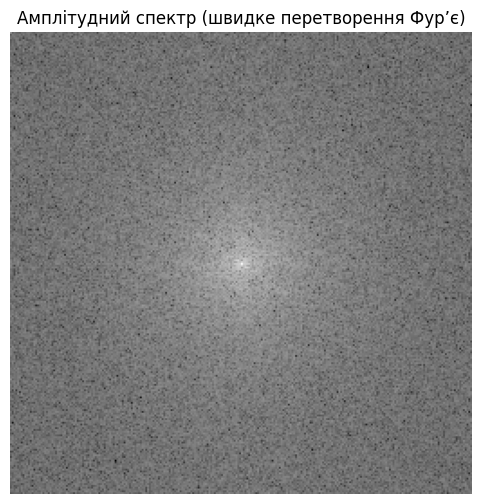

In [5]:
# 3. Швидке перетворення Фур’є (ШПФ)
# Використання функції np.fft.fft2 для швидкого перетворення
fast_transform = np.fft.fft2(image)
fast_transform_shifted = np.fft.fftshift(fast_transform)

# Амплітудний спектр швидкого перетворення
fast_magnitude_spectrum = 20 * np.log(np.abs(fast_transform_shifted) + 1)
plt.figure(figsize=(6, 6))
plt.imshow(fast_magnitude_spectrum, cmap='gray')
plt.title('Амплітудний спектр (швидке перетворення Фур’є)')
plt.axis('off')
plt.show()

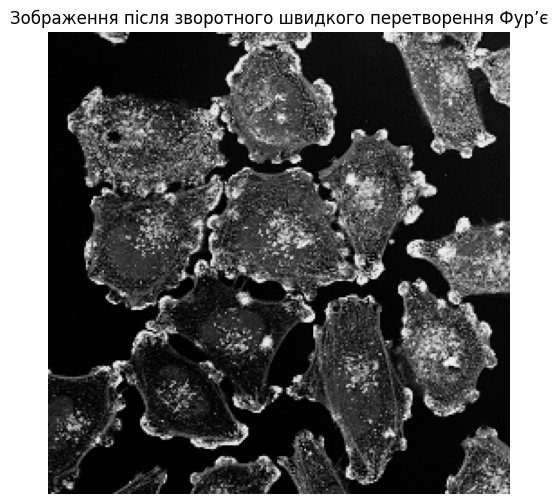

In [6]:
# Зворотне швидке перетворення Фур’є
fast_inverse_shifted = np.fft.ifftshift(fast_transform_shifted)
fast_image_reconstructed = np.fft.ifft2(fast_inverse_shifted)
fast_image_reconstructed = np.abs(fast_image_reconstructed)

# Візуалізація результату після зворотного швидкого перетворення
plt.figure(figsize=(6, 6))
plt.imshow(fast_image_reconstructed, cmap='gray')
plt.title('Зображення після зворотного швидкого перетворення Фур’є')
plt.axis('off')
plt.show()